# Trending YouTube Video EDA

## 1. Preprocess and Clean Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import STOPWORDS,WordCloud
path = "./data/GBvideos.csv"
GBVideos = pd.read_csv(path)

### 1.1 Convert Category_id to Category names

In [2]:
import json
f = open("./data/GB_category_id.json")
data = f.read()
f.close()
out = json.loads(data)
categories = pd.DataFrame([
    {'category_id':x['id'],
     'category':x['snippet']['title'],
     'assignable':x['snippet']['assignable']
    } for x in out['items']
])
categories['category_id'] = categories['category_id'].astype(int)
categories.head()

,category_id,category,assignable
0,1,Film & Animation,True
1,2,Autos & Vehicles,True
2,10,Music,True
3,15,Pets & Animals,True
4,17,Sports,True


In [3]:
GBVideos['category_id'] = GBVideos['category_id'].astype(int)
GBVideos = GBVideos.merge(categories, on='category_id')
GBVideos.drop(['assignable','category_id'], axis=1)
GBVideos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,assignable
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,Howto & Style,True
1,MyEqfBkzESU,17.14.11,EXTREME GOLDEN TAN TRANSFORMATION,John Maclean,26,2017-11-10T20:40:44.000Z,"Extreme Tan|""Tanning""|""Tanning Bed""|""How to ge...",300617,8133,2693,2911,https://i.ytimg.com/vi/MyEqfBkzESU/default.jpg,False,False,False,-\n\n\nWebsite - http://www.johnmaclean.co.uk\...,Howto & Style,True
2,b4vTZx_AtHk,17.14.11,How To Dry a Shirt in 30 Seconds,HowToBasic,26,2017-11-09T18:36:48.000Z,"how to dry a shirt in 30 seconds|""how to dry a...",2063667,98804,11682,11443,https://i.ytimg.com/vi/b4vTZx_AtHk/default.jpg,False,False,False,Today I show you how to completely dry a shirt...,Howto & Style,True
3,OWvCCu2t6Ts,17.14.11,SO Much To Tell You | 32 Weeks Pregnant | MOTH...,Sprinkleofglitter,26,2017-11-10T16:59:50.000Z,"sprinkleofglitter|""sprinkle of glitter""|""Louis...",238843,10028,248,650,https://i.ytimg.com/vi/OWvCCu2t6Ts/default.jpg,False,False,False,A big chat about everything going on in my pre...,Howto & Style,True
4,9GqL1DSQDL0,17.14.11,GET READY WITH ME + LILY! (we're so immature bye),makeupbymichaelfinch,26,2017-11-09T22:00:00.000Z,"Lily brown|""michael finch""|""makeupbymichaelfin...",332967,22303,700,1523,https://i.ytimg.com/vi/9GqL1DSQDL0/default.jpg,False,False,False,Hey babes! Happy Friday! It's the WEEKENDDD He...,Howto & Style,True


### 1.2 Clean Data, fill nan value and drop duplicates

In [4]:
GBVideos.fillna(" ",inplace=True)
GBVideos = GBVideos.drop_duplicates()
GBVideos = GBVideos.reset_index().drop_duplicates('video_id',keep ='first').set_index('video_id')
GBVideos.head(3)

,index,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,assignable
video_id,,,,,,,,,,,,,,,,,,
Jw1Y-zhQURU,0,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,Howto & Style,True
MyEqfBkzESU,1,17.14.11,EXTREME GOLDEN TAN TRANSFORMATION,John Maclean,26,2017-11-10T20:40:44.000Z,"Extreme Tan|""Tanning""|""Tanning Bed""|""How to ge...",300617,8133,2693,2911,https://i.ytimg.com/vi/MyEqfBkzESU/default.jpg,False,False,False,-\n\n\nWebsite - http://www.johnmaclean.co.uk\...,Howto & Style,True
b4vTZx_AtHk,2,17.14.11,How To Dry a Shirt in 30 Seconds,HowToBasic,26,2017-11-09T18:36:48.000Z,"how to dry a shirt in 30 seconds|""how to dry a...",2063667,98804,11682,11443,https://i.ytimg.com/vi/b4vTZx_AtHk/default.jpg,False,False,False,Today I show you how to completely dry a shirt...,Howto & Style,True


In [5]:
GBVideos = GBVideos.fillna(method='ffill')
GBVideos.describe()

,index,category_id,views,likes,dislikes,comment_count
count,3266.000000,3266.000000,3.266000e+03,3.266000e+03,3266.000000,3266.000000
mean,18814.706981,17.972137,1.293765e+06,5.410735e+04,2312.178812,6281.892529
std,11959.127580,7.507147,4.386501e+06,1.687121e+05,16595.867855,27732.638350
min,0.000000,1.000000,8.510000e+02,0.000000e+00,0.000000,0.000000
25%,7856.750000,10.000000,8.902400e+04,2.516750e+03,73.000000,324.250000
50%,18086.000000,22.000000,2.796270e+05,8.432500e+03,251.500000,1026.500000
75%,29429.750000,24.000000,9.689270e+05,3.550700e+04,1021.750000,3675.750000
max,38788.000000,28.000000,1.434082e+08,3.880074e+06,629123.000000,733371.000000


In [6]:
GBVideos.sort_values(['views'], ascending=False)

,index,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,assignable
video_id,,,,,,,,,,,,,,,,,,
TyHvyGVs42U,11923,17.01.12,"Luis Fonsi, Demi Lovato - Échame La Culpa",LuisFonsiVEVO,10,2017-11-17T05:00:01.000Z,"Luis|""Fonsi""|""Demi""|""Lovato""|""Échame""|""La""|""Cu...",143408235,2686169,137938,144217,https://i.ytimg.com/vi/TyHvyGVs42U/default.jpg,False,False,False,“Échame La Culpa” disponible ya en todas las p...,Music,True
zEf423kYfqk,21851,18.06.05,"Becky G, Natti Natasha - Sin Pijama (Official ...",BeckyGVEVO,10,2018-04-20T10:40:51.000Z,"Becky G|""Natti Natasha""|""Natti Natasha Music""|...",88568646,1185357,99361,70242,https://i.ytimg.com/vi/zEf423kYfqk/default.jpg,False,False,False,Becky G & Natti Natasha – “Sin Pijama”NUEVO SE...,Music,True
WtE011iVx1Q,19894,18.14.04,"Sebastián Yatra - Por Perro ft. Luis Figueroa,...",SebastianYatraVEVO,10,2018-03-30T04:00:02.000Z,"Sebastián|""Yatra""|""Por""|""Perro""|""Andres""|""Saav...",47669287,396337,15105,15955,https://i.ytimg.com/vi/WtE011iVx1Q/default.jpg,False,False,False,Music video by Sebastián Yatra performing Por ...,Music,True
Ck4xHocysLw,21486,18.02.05,Ozuna - Única (Video Oficial) 🐻 A U R A,Ozuna,10,2018-04-26T17:52:13.000Z,"Ozuna|""Reggaeton""|""Odisea""|""Odisea The Album""|...",42923278,495422,17706,18091,https://i.ytimg.com/vi/Ck4xHocysLw/default.jpg,False,False,False,DESCARGA Odisea Aqui: http://apple.co/2vX00sT\...,Music,True
7C2z4GqqS5E,22822,18.19.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",39349927,3880074,72707,692311,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Music,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B1tEq5RU-Wo,25298,17.19.12,Best bikes in the world: Cotic Soul,Guy Kesteven,17,2017-12-15T20:51:50.000Z,"iMovie|""mountain bike""|""mountain biking""|""sing...",1930,54,0,24,https://i.ytimg.com/vi/B1tEq5RU-Wo/default.jpg,False,False,False,#sponsored Full live ride reviews of the lates...,Sports,True
BsQZPKeaKBg,38614,17.17.12,1080p WOLF OF THE AUTOSTRADA - RUF Automobile ...,VirusTornado,2,2017-12-13T20:08:02.000Z,"RUF|""porsche""|""ctr""|""yellowbird""|""911""|""carrer...",1858,61,1,13,https://i.ytimg.com/vi/BsQZPKeaKBg/default.jpg,False,False,False,FULL HD VERSION\n\nFeaturing Valentino Balboni...,Autos & Vehicles,True
NcVxrr_q3Hw,27,17.15.11,George Durack | Remembrance Sunday | You Can't...,Official Jeremy Corbyn Channel,26,2017-11-12T07:37:46.000Z,[none],1505,88,12,40,https://i.ytimg.com/vi/NcVxrr_q3Hw/default.jpg,False,False,False,"Ahead of Remembrance Sunday, I visited my frie...",Howto & Style,True


In [7]:
GBVideos['rating'] = pd.qcut(GBVideos.likes, q=3, labels=['low','medium','high'])

In [8]:
GBVideos.columns

Index(['index', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category', 'assignable',
       'rating'],
      dtype='object')

In [9]:
attributes = GBVideos.drop(['index', 'trending_date', 'title', 'channel_title',
       'publish_time', 'tags', 'likes', 'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category', 'assignable','rating'], axis=1)
attributes.head()
attributes = attributes.reset_index()
attributes = attributes.drop(['video_id'], axis=1)

In [10]:
attributes.head()

,category_id,views,dislikes,comment_count
0,26,7224515,10247,9479
1,26,300617,2693,2911
2,26,2063667,11682,11443
3,26,238843,248,650
4,26,332967,700,1523


In [11]:
#target = pd.get_dummies(GBVideos.rating) 
target = GBVideos.rating
target = target.reset_index()
target = target.drop(['video_id'], axis=1)
#target = pd.get_dummies(target)
target.head()

,rating
0,high
1,medium
2,high
3,medium
4,high


In [12]:
from sklearn import tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import graphviz

In [49]:
params = {'max_depth': [1,2,3,4,5,6,7,8,9,10]}

Tree = tree.DecisionTreeClassifier()
TreeCV = GridSearchCV(Tree, param_grid=params)
TreeCV.fit(attributes, target) 

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
   

In [50]:
TreeCV.best_params_

{'max_depth': 4}

In [52]:
Tree = tree.DecisionTreeClassifier(max_depth=2)
Tree.fit(attributes, target) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

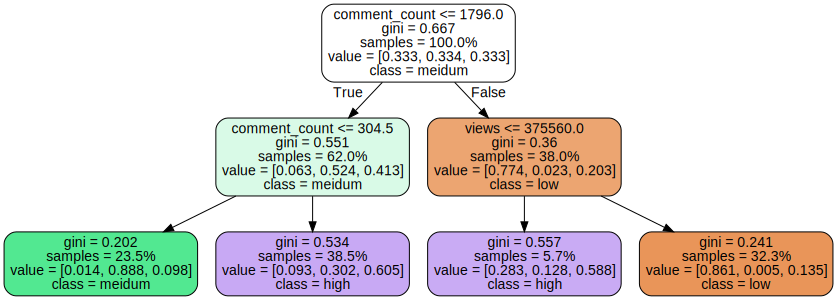

In [58]:
dot_data = tree.export_graphviz(Tree, out_file=None,
                                feature_names=attributes.columns, 
                                class_names=['low','meidum','high'], 
                                proportion=True, impurity=True,
                                filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render('rating')
graph


## 2.Process Trending Date and Publish Time

### 2.1 Change "trending_date" and "publish_time" to proper data format.

In [11]:
GBVideos["trending_date"] = pd.to_datetime(GBVideos["trending_date"],errors='coerce',format="%y.%d.%m")
GBVideos["publish_time"] = pd.to_datetime(GBVideos["publish_time"],errors='coerce')

### 2.2 Create some New columns for time analysis.

In [12]:
#Create some New columns for time analysis.
GBVideos["trending_year"] = GBVideos["trending_date"].apply(lambda time:time.year).astype(int)
GBVideos["trending_month"] = GBVideos["trending_date"].apply(lambda time:time.month).astype(int)
GBVideos["trending_day"] = GBVideos["trending_date"].apply(lambda time:time.day).astype(int)
GBVideos["trending_week_day"] = GBVideos["trending_date"].apply(lambda time:time.dayofweek).astype(int)
GBVideos["publish_year"] = GBVideos["publish_time"].apply(lambda time:time.year).astype(int)
GBVideos["publish_month"] = GBVideos["publish_time"].apply(lambda time:time.month).astype(int)
GBVideos["publish_day"] = GBVideos["publish_time"].apply(lambda time:time.day).astype(int)
GBVideos["publish_Week_day"]= GBVideos["publish_time"].apply(lambda time:time.dayofweek).astype(int)
GBVideos["publish_hour"] = GBVideos["publish_time"].apply(lambda time:time.hour).astype(int)

### 2.3 New Data Frame Created But day of week in numeric format we need to convert it.astype(int)

In [13]:
dmap1 = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}#We're Using this Dictionary to Map our column
GBVideos["publish_Week_day"] = GBVideos["publish_Week_day"].map(dmap1)
GBVideos["trending_week_day"] = GBVideos["trending_week_day"].map(dmap1)
GBVideos.head(3)

,index,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,rating,trending_year,trending_month,trending_day,trending_week_day,publish_year,publish_month,publish_day,publish_Week_day,publish_hour
video_id,,,,,,,,,,,,,,,,,,,,,
Jw1Y-zhQURU,0,2017-11-14,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10 07:38:29+00:00,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,...,high,2017,11,14,Tue,2017,11,10,Fri,7
MyEqfBkzESU,1,2017-11-14,EXTREME GOLDEN TAN TRANSFORMATION,John Maclean,26,2017-11-10 20:40:44+00:00,"Extreme Tan|""Tanning""|""Tanning Bed""|""How to ge...",300617,8133,2693,...,medium,2017,11,14,Tue,2017,11,10,Fri,20
b4vTZx_AtHk,2,2017-11-14,How To Dry a Shirt in 30 Seconds,HowToBasic,26,2017-11-09 18:36:48+00:00,"how to dry a shirt in 30 seconds|""how to dry a...",2063667,98804,11682,...,high,2017,11,14,Tue,2017,11,9,Thu,18


## 3. Word Cloud for Trending Tags

FileNotFoundError: [Errno 2] No such file or directory: './figures/tagcloud.png'

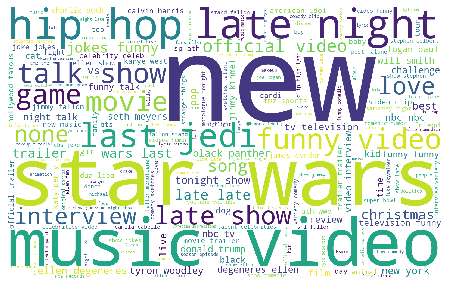

In [14]:
tags = GBVideos['tags'].map(lambda x:x.lower().split('|')).values
splt_tags = ' '.join(GBVideos['tags'])
wordcloud = WordCloud(width=1600,height=1000, background_color="white").generate(' '.join(splt_tags.lower().split('|')))

plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

wordcloud.to_file('./figures/tagcloud.png')

In [ ]:
GBVideos_gb = GBVideos.groupby('category').count()['title']
GBVideos_gb = GBVideos_gb.rename(columns=['category','count']).sort_values()
index = GBVideos_gb.index.get_level_values(0).tolist()
GBVideos_gb = GBVideos_gb.reset_index()
values = GBVideos_gb[0].tolist()

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.yaxis.grid()
ax.xaxis.grid()
bars = ax.bar(index, values)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

for i, b in enumerate(bars):
    b.set_color(plt.cm.viridis((values[i] - min(values))/(max(values)- min(values))))
    
plt.ylabel('Video Count', fontsize=20)
plt.xlabel('Category', fontsize=20)
plt.title('Video Count by Categories', fontsize=35, fontweight='bold')
plt.xticks(np.arange(0, len(index), len(index)/6), [0, 4, 8, 12, 16, 20])
plt.savefig('./figures/category_count.png')
plt.show()

## 5. Best Time to Publish a Video

In [ ]:
publish_h = [0] * 24

for index, row in GBVideos.iterrows():
    publish_h[row["publish_hour"]] += 1
    
values = publish_h
ind = np.arange(len(values))

# Creating new plot
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.yaxis.grid()
ax.xaxis.grid()
bars = ax.bar(ind, values)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Sampling of Colormap
for i, b in enumerate(bars):
    b.set_color(plt.cm.viridis((values[i] - min(values))/(max(values)- min(values))))
    
plt.ylabel('Number of videos that got trending', fontsize=20)
plt.xlabel('Time of publishing', fontsize=20)
plt.title('Best time to publish video', fontsize=35, fontweight='bold')
plt.xticks(np.arange(0, len(ind), len(ind)/6), [0, 4, 8, 12, 16, 20])
plt.savefig('./figures/best_time_to_publish.png')
plt.show()

In [ ]:
publish_h = [0] * 24

for index, row in GBVideos.iterrows():
    publish_h[row["trending_month"]] += 1
    
values = publish_h
ind = np.arange(len(values))

# Creating new plot
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.yaxis.grid()
ax.xaxis.grid()
bars = ax.bar(ind, values)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Sampling of Colormap
for i, b in enumerate(bars):
    b.set_color(plt.cm.viridis((values[i] - min(values))/(max(values)- min(values))))
    
plt.ylabel('Number of videos that got trending', fontsize=20)
plt.xlabel('Time of publishing', fontsize=20)
plt.title('Best time to publish video', fontsize=35, fontweight='bold')
plt.xticks(np.arange(0, len(ind), len(ind)/6), [0, 4, 8, 12, 16, 20])
plt.savefig('./figures/month_trending_count.png')
plt.show()

## 6. Views, Likes, Dislikes, and Comments Correlation HeatMap

In [15]:
column_list = ['views', 'likes', 'dislikes', 'comment_count']
corr_matrix = GBVideos[column_list].corr()
corr_matrix

,views,likes,dislikes,comment_count
views,1.000000,0.689176,0.370521,0.437346
likes,0.689176,1.000000,0.391994,0.794756
dislikes,0.370521,0.391994,1.000000,0.713932
comment_count,0.437346,0.794756,0.713932,1.000000


FileNotFoundError: [Errno 2] No such file or directory: './figures/view_likes_dislikes_comments_corr.png'

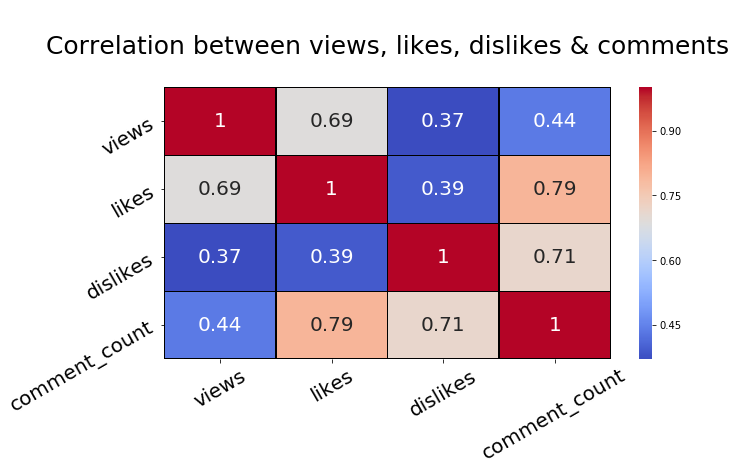

In [16]:
from matplotlib import cm
plt.figure(figsize = (10,5))

ax = sns.heatmap(GBVideos[['views', 'likes', 'dislikes', 'comment_count']].corr(), \
            annot=True, annot_kws={"size": 20}, cmap=cm.coolwarm, linewidths=0.5, linecolor='black')
plt.yticks(rotation=30, fontsize=20) 
plt.xticks(rotation=30, fontsize=20) 
plt.title("\nCorrelation between views, likes, dislikes & comments\n", fontsize=25)
plt.savefig('./figures/view_likes_dislikes_comments_corr.png')
plt.show()

## Plotly Interactive Visulizing

In [21]:
GBVideos_cat = GBVideos.groupby('category').mean()
GBVideos_cat = GBVideos_cat.reset_index()
#GBVideos_cat.to_csv('./data/category_mean.csv')
GBVideos_cat['views'] = GBVideos_cat['views'].div(10000).round(2)

GBVideos_channel = GBVideos.groupby('channel_title').mean()
GBVideos_channel = GBVideos_channel.reset_index()
#GBVideos_cat.to_csv('./data/category_mean.csv')
GBVideos_channel['views'] = GBVideos_channel['views'].div(10000).round(2)

In [22]:
import plotly
import plotly.graph_objects as go
import plotly.express as px
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
import plotly.tools as tls

/usr/local/lib/python3.7/site-packages/plotly/express/_doc.py:503: DeprecationWarning:

inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()

/usr/local/lib/python3.7/site-packages/plotly/express/_doc.py:503: DeprecationWarning:

inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()

/usr/local/lib/python3.7/site-packages/plotly/express/_doc.py:503: DeprecationWarning:

inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()

/usr/local/lib/python3.7/site-packages/plotly/express/_doc.py:503: DeprecationWarning:

inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()

/usr/local/lib/python3.7/site-packages/plotly/express/_doc.py:503: DeprecationWarning:

inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()

/usr/local/lib/python3.7/site-

In [21]:
GBVideos_cat_trending = GBVideos.drop(['category_id', 'video_error_or_removed', 'description', 'channel_title', 'assignable', 'tags','thumbnail_link', 'comments_disabled', 'ratings_disabled', 'publish_time', 'publish_year', 'publish_month', 'publish_day', 'publish_Week_day',
       'publish_hour'], axis=1)
GBVideos_cat_trending.to_csv('./data/category_trending_time.csv')
fig = px.parallel_categories(GBVideos_cat_trending, width=800, height=600)
fig.show()
plotly.offline.plot(fig, filename='./html_plots/category_trending_time.html')

'./html_plots/category_trending_time.html'

In [20]:
GBVideos_cat_publish = GBVideos.drop(['category_id', 'video_error_or_removed', 'description', 'channel_title', 'assignable', 'tags','thumbnail_link', 'comments_disabled', 'ratings_disabled','trending_year', 'trending_month', 'trending_day', 'trending_week_day'], axis=1)
fig = px.parallel_categories(GBVideos_cat_publish, width=900, height=600)
fig.show()
plotly.offline.plot(fig, filename='./html_plots/category_publish_time.html')

'./html_plots/category_publish_time.html'

In [28]:
GBVideos_cat_publish = GBVideos.drop(['category_id', 'video_error_or_removed', 'description', 'channel_title', 'assignable', 'tags','thumbnail_link', 'comments_disabled', 'ratings_disabled','trending_year', 'trending_month', 'trending_day', 'trending_week_day'], axis=1)
GBVideos_cat_publish.to_csv('./data/category_publish_time.csv')

In [22]:
GBVideos_disabled = GBVideos.drop(['category_id', 'description', 'channel_title', 'assignable', 'tags','thumbnail_link','trending_year', 'trending_month', 'trending_day', 'trending_week_day', 'publish_time', 'publish_year', 'publish_month', 'publish_day', 'publish_Week_day'], axis=1)
fig = px.parallel_categories(GBVideos_disabled, width=800, height=600)
fig.show()
plotly.offline.plot(fig, filename='./html_plots/category_disabled.html')

'./html_plots/category_disabled.html'

In [23]:
categories = ['Music', 'Entertainment', 'People & Blogs']

fig1 = go.Figure()
fig2 = go.Figure()


for category in categories:
    fig1.add_trace(go.Violin(x=GBVideos['category'][GBVideos['category'] == category],
                            y=GBVideos['publish_month'][GBVideos['category'] == category],
                            name=category, box_visible=True, meanline_visible=True))

    fig2.add_trace(go.Violin(x=GBVideos['category'][GBVideos['category'] == category],
                            y=GBVideos['trending_month'][GBVideos['category'] == category],
                            name=category, box_visible=True, meanline_visible=True))

fig1.show()
fig2.show()

plotly.offline.plot(fig1, filename='./html_plots/major_category_publish_month.html')
plotly.offline.plot(fig2, filename='./html_plots/major_category_trending_month.html')

'./html_plots/major_category_trending_month.html'

In [31]:
GBVideos_cat = GBVideos.groupby('category').mean()
GBVideos_cat = GBVideos_cat.reset_index()

fig1 = go.Figure(go.Histogram2dContour(
        x = GBVideos_cat['views'],
        y = GBVideos_cat['comment_count'],
        colorscale = 'Jet',
    contours = dict(
        showlabels = True,
        labelfont = dict(
            family = 'Raleway',
            color = 'white')),
        hoverlabel = dict(
            bgcolor = 'white',
            bordercolor = 'black',
            font = dict(
                family = 'Raleway',
                color = 'black'))))
fig1.show()

fig2 = go.Figure(go.Histogram2dContour(
    x = GBVideos_cat['likes'],
    y = GBVideos_cat['dislikes'],
    colorscale = 'Jet',
    contours = dict(
        showlabels = True,
        labelfont = dict(
            family = 'Raleway',
            color = 'white')),
        hoverlabel = dict(
            bgcolor = 'white',
            bordercolor = 'black',
            font = dict(
                family = 'Raleway',
                color = 'black'))))
fig2.show()

plotly.offline.plot(fig1, filename='./html_plots/mean_views_comments.html')
plotly.offline.plot(fig2, filename='./html_plots/mean_likes_dislikes.html')

'./html_plots/mean_likes_dislikes.html'

In [26]:
GBVideos_channel = GBVideos.groupby(['channel_title']).count()
top_creators = GBVideos_channel.sort_values('title', ascending=False)
top_creators = top_creators.head(25).reset_index()

fig = px.bar(top_creators, x="title", y="channel_title", color='likes',width=800, height=600,
    orientation='h', title='Number of trending video made by Channels')
fig.show()

plotly.offline.plot(fig, filename='./html_plots/trending_channels.html')

'./html_plots/trending_channels.html'

In [27]:
import math

# Load data, define hover text and bubble size
data = px.data.gapminder()
hover_text = []
bubble_size = []
gb_videos = GBVideos.groupby('category').max().reset_index()

for index, row in gb_videos.iterrows():
    hover_text.append(('Title: {title}<br>'+
                      'Channel Title: {channel_title}<br>'+
                      'Category: {category}<br>'+
                      'Trending Date: {trending_date}')
                      .format(title=row['title'],
                       channel_title=row['channel_title'],
                       category=row['category'],
                       trending_date=row['trending_date']))

    bubble_size.append(math.sqrt(row['views']))

gb_videos['text'] = hover_text
gb_videos['size'] = bubble_size
sizeref = 2.*max(gb_videos['size'])/(100**2)

# Dictionary with dataframes for each continent
categories = list(set(list(GBVideos.category)))
category_data = {category:gb_videos.query("category == '%s'" %category)
                              for category in categories}

In [23]:
fig = go.Figure()

for category_name, category in category_data.items():
    fig.add_trace(go.Scatter3d(
        x=category['likes'], y=category['dislikes'], z=category['views'],
        name=category_name, text=category['text'],
        marker_size=category['size']))

fig.update_traces(mode='markers', 
    marker=dict(sizemode='area',
                sizeref=sizeref, line_width=2))

fig.update_layout(
    title='Likes v. Dislikes',
    xaxis=dict(
        title='Likes',
        gridcolor='white',
        type='log',
        gridwidth=2,
    ),
    yaxis=dict(
        title='Dislikes',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)
fig.show()

plotly.offline.plot(fig, filename='category_3d_scatter.html')

#mpld3.save_html(fig_html, 'likes_vs_dislikes.html')

NameError: name 'category_data' is not defined

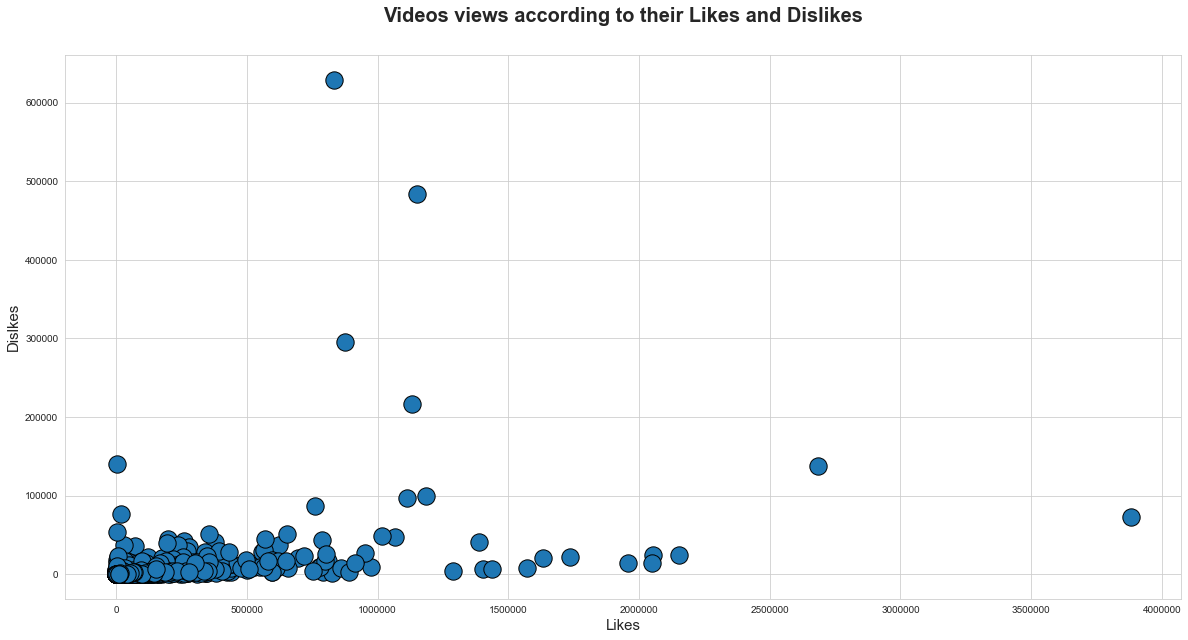

In [35]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
plt.title('Videos views according to their Likes and Dislikes', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Likes', fontsize=15)
plt.ylabel('Dislkes', fontsize=15)

likes = GBVideos["likes"].values
dislikes = GBVideos["dislikes"].values
views = GBVideos["views"].values

plt.scatter(likes, dislikes, s = 300, edgecolors='black')
plt.show()

In [9]:
import seaborn as snb
plt.figure(figsize=(15,8))
hours = GBVideos.groupby(["category","trending_hour"]).count()["title"].unstack()
ax = snb.heatmap(hours, cmap=cm.coolwarm, linewidths=0.5, linecolor='black')
plt.yticks(rotation=30, fontsize=15) 
plt.xticks(rotation=30, fontsize=15) 
plt.title("\nGreat Britain Videos in 12 Hours\n", fontsize=23)
plt.show()
fig = ax.get_figure()
fig.savefig('./video_12h.png')

KeyError: 'trending_hour'

<Figure size 1080x576 with 0 Axes>

In [52]:
GBVideos.columns

Index(['index', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category', 'assignable',
       'trending_year', 'trending_month', 'trending_day', 'trending_week_day',
       'publish_year', 'publish_month', 'publish_day', 'publish_Week_day',
       'publish_hour', 'Text_Feature'],
      dtype='object')

In [28]:
max_title_length = 20
number_of_late_bloomers = 20

# Transforming Trending date column to datetime format
GBVideos['trending_date'] = pd.to_datetime(GBVideos['trending_date'], format='%y.%d.%m').dt.date

# Transforming Trending date column to datetime format and splitting into two separate ones
publish_time = pd.to_datetime(GBVideos['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
GBVideos['publish_date'] = publish_time.dt.date
GBVideos['publish_time'] = publish_time.dt.time
GBVideos['publish_hour'] = publish_time.dt.hour

GBVideos["time_to_trend"] = (GBVideos.trending_date - GBVideos.publish_date) / np.timedelta64(1, 'D')
late_bloomers = GBVideos.sort_values(["time_to_trend"], ascending=False).head(number_of_late_bloomers)
late_bloomers_title = [(x if len(x) <= max_title_length else x[:max_title_length] + "...") for x in late_bloomers.title.values]
late_bloomers_days = late_bloomers.time_to_trend.values
late_bloomers_views = late_bloomers.views.values

trace1 = go.Bar(
    x = late_bloomers_title,
    y = late_bloomers_days,
    name='Number of days',
    marker=dict(
        color='rgba(55, 128, 191, 0.7)',
        line=dict(
            color='rgba(55, 128, 191, 1.0)',
            width=2,
        )
    )
)
trace2 = go.Bar(
    x = late_bloomers_title,
    y = late_bloomers_views,
    name='total views',
    marker=dict(
        color='rgba(219, 64, 82, 0.7)',
        line=dict(
            color='rgba(219, 64, 82, 1.0)',
            width=2,
        )
    ),
    yaxis='y2'
)


data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    title = 'Late bloomers',
    width=800,
    height=600,
    margin=go.layout.Margin(
        l=75,
        r=75,
        b=120,
        t=80,
        pad=10
    ),
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    yaxis = dict(
        title= 'Number of days until becoming trending',
        anchor = 'x',
        rangemode='tozero'
    ),   
    yaxis2=dict(
        title='Total number of views',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right',
        anchor = 'x',
        rangemode = 'tozero',
        dtick = 61000
    ),
    #legend=dict(x=-.1, y=1.2)
    legend=dict(x=0.1, y=0.05)
)

fig = go.Figure(data=data, layout=layout)

from plotly.offline import plot
fig.show()

plotly.offline.plot(fig, filename='late_bloomer.html')

'late_bloomer.html'

In [30]:
max_title_length = 20
number_of_late_bloomers = 10
GBVideos['dislike_percentage'] = GBVideos['dislikes'] / (GBVideos['dislikes'] + GBVideos['likes'])
most_disliked = GBVideos.sort_values(["dislikes"], ascending=False).head(number_of_late_bloomers)
most_disliked_title = [(x if len(x) <= max_title_length else x[:max_title_length] + "...") for x in late_bloomers.title.values]
most_disliked_l_number = most_disliked.likes.values
most_disliked_dl_number = most_disliked.dislikes.values
most_disliked_dl_percentage = most_disliked.dislike_percentage.values

trace1 = go.Bar(
    x = most_disliked_title,
    y = most_disliked_l_number,
    name='Number of likes',
    marker=dict(
        color='rgba(55, 128, 191, 0.7)',
        line=dict(
            color='rgba(55, 128, 191, 1.0)',
            width=2,
        )
    )
)
trace2 = go.Bar(
    x = most_disliked_title,
    y = most_disliked_dl_number,
    name='Number of dislikes',
    marker=dict(
        color='rgba(219, 64, 82, 0.7)',
        line=dict(
            color='rgba(219, 64, 82, 1.0)',
            width=2,
        )
    )
)

trace3 = go.Scatter(
    x = most_disliked_title,
    y = most_disliked_dl_percentage,
    name='Dislike percentage',
    mode = 'markers',
    marker=dict(
        symbol="hexagon-dot",
        size=15
    ),
    yaxis='y2'
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='group',
    title = 'Famous By Dislikes',
    width=800,
    height=600,
    margin=go.layout.Margin(
        l=75,
        r=75,
        b=120,
        t=80,
        pad=10
    ),
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    yaxis = dict(
        title= 'Number of likes/dislikes',
        anchor = 'x',
        rangemode='tozero'
    ),   
    yaxis2=dict(
        title='Dislike percentage',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right',
        anchor = 'x',
        rangemode = 'tozero',
        dtick = 0.165
    ),
    legend=dict(x=0.75, y=1)
)

fig = go.Figure(data=data, layout=layout)
fig.show()

plotly.offline.plot(fig, filename='famous_by_dislikes.html')

'famous_by_dislikes.html'

In [46]:
category_sum = GBVideos.groupby(['category']).count().reset_index()

trace1 = go.Bar(
    x = category_sum['category'],
    y = category_sum['title'],
    name='Video Counts',
    marker=dict(
        color='rgba(55, 128, 191, 0.7)',
        line=dict(
            color='rgba(55, 128, 191, 1.0)',
            width=2,
        )
    )
)

data = [trace1]
layout = go.Layout(
    barmode='group',
    title = 'Number of Videos Per Category',
    width=800,
    height=500,
    margin=go.Margin(
        l=75,
        r=75,
        b=120,
        t=80,
        pad=10
    ),
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    yaxis = dict(
        title= 'Number videos',
        anchor = 'x',
        rangemode='tozero'
    ),   
    legend=dict(x=0.75, y=1)
)

fig = go.Figure(data=data, layout=layout)
fig.show()

plotly.offline.plot(fig, filename='category_counts.html')

'category_counts.html'

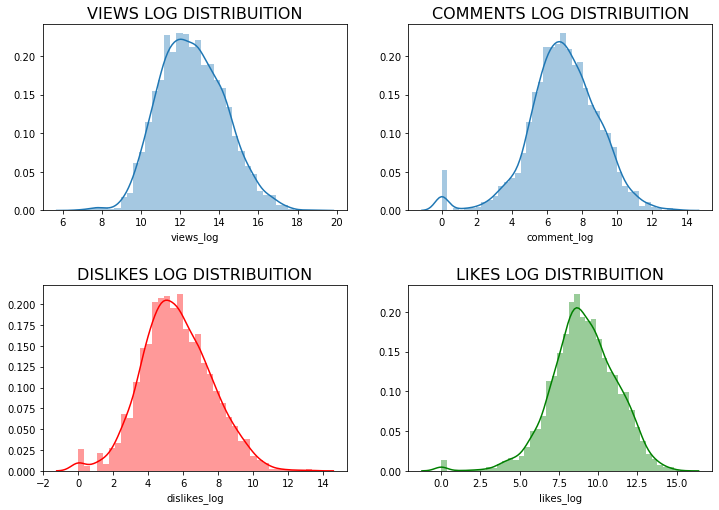

In [25]:
import numpy as np

GBVideos['likes_log'] = np.log(GBVideos['likes'] + 1)
GBVideos['views_log'] = np.log(GBVideos['views'] + 1)
GBVideos['dislikes_log'] = np.log(GBVideos['dislikes'] + 1)
GBVideos['comment_log'] = np.log(GBVideos['comment_count'] + 1)

plt.figure(figsize = (12,8))

plt.subplot(221)
g1 = sns.distplot(GBVideos['views_log'])
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(GBVideos['likes_log'],color='green')
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(GBVideos['dislikes_log'], color='r')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(GBVideos['comment_log'])
g4.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)
fig = plt.gcf()
fig.savefig('trending_stats_distribution.png', dpi=100)
plt.show()


In [41]:
print("Views quantiles")
print(GBVideos['views'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Likes quantiles")
print(GBVideos['likes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Dislikes quantiles")
print(GBVideos['dislikes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Comment quantiles")
print(GBVideos['comment_count'].quantile([.01,.25,.5,.75,.99]))

Views quantiles
0.01        9805.2
0.25       89024.0
0.50      279627.0
0.75      968927.0
0.99    17417240.2
Name: views, dtype: float64

Likes quantiles
0.01        40.60
0.25      2516.75
0.50      8432.50
0.75     35507.00
0.99    778029.25
Name: likes, dtype: float64

Dislikes quantiles
0.01        1.00
0.25       73.00
0.50      251.50
0.75     1021.75
0.99    29656.30
Name: dislikes, dtype: float64

Comment quantiles
0.01        0.00
0.25      324.25
0.50     1026.50
0.75     3675.75
0.99    77790.45
Name: comment_count, dtype: float64


Music             876
Entertainment     859
People & Blogs    284
Sports            213
Comedy            204
Name: category, dtype: int64


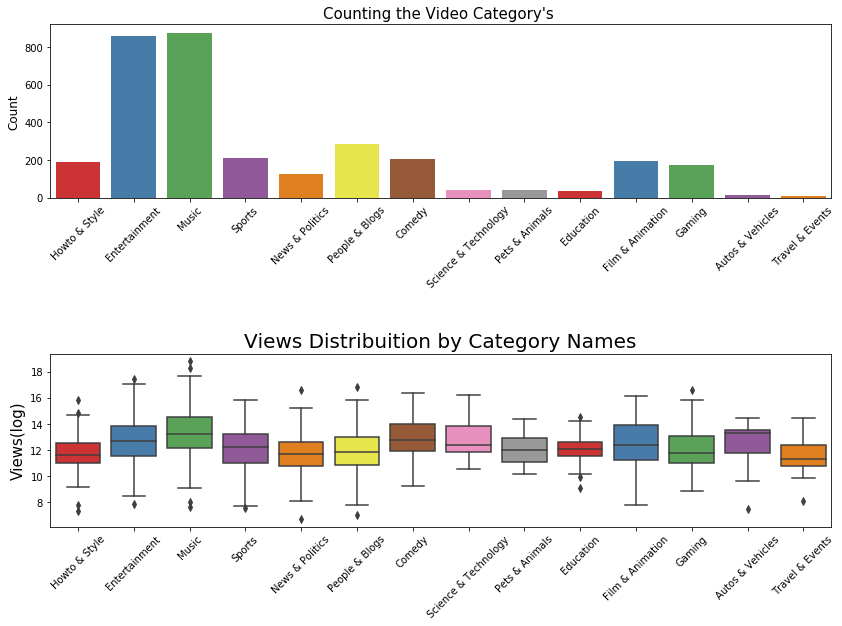

In [42]:
print(GBVideos.category.value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('category', data=GBVideos, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting the Video Category's ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)

plt.subplot(212)
g1 = sns.boxplot(x='category', y='views_log', data=GBVideos, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Views Distribuition by Category Names", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Views(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.savefig('count_category.png', dpi=100)
plt.show()

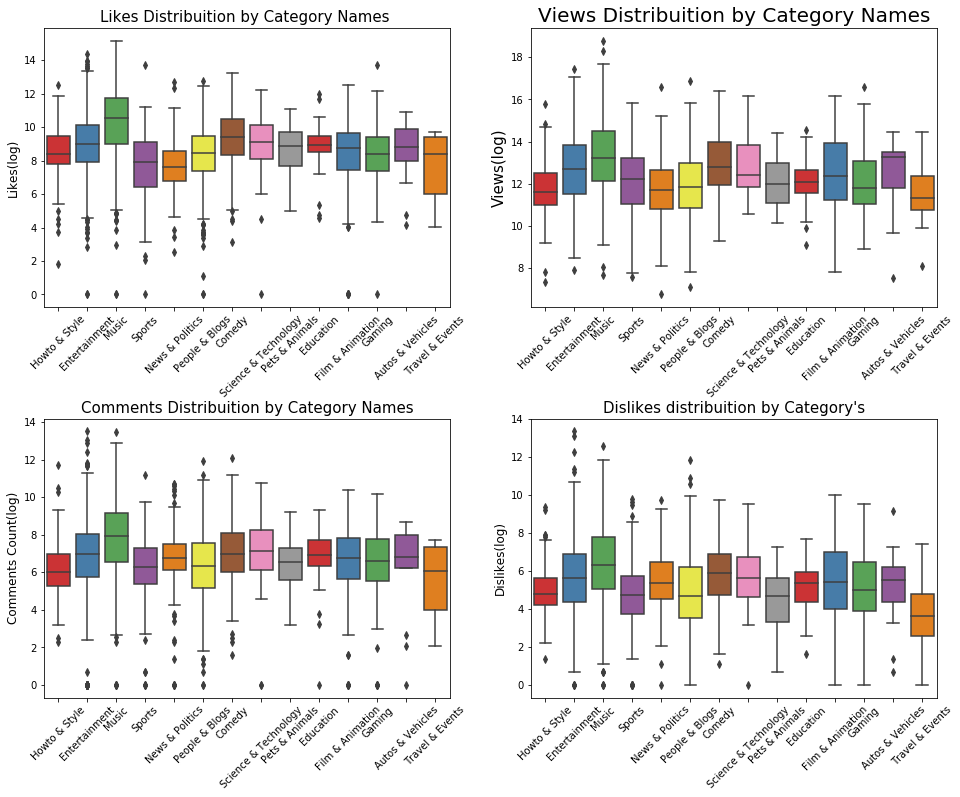

In [43]:
plt.figure(figsize = (16,12))

plt.subplot(221)
g1 = sns.boxplot(x='category', y='likes_log', data=GBVideos, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Likes Distribuition by Category Names ", fontsize=15)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Likes(log)", fontsize=12)

plt.subplot(222)
g4 = sns.boxplot(x='category', y='views_log', data=GBVideos, palette="Set1")
g4.set_xticklabels(g.get_xticklabels(),rotation=45)
g4.set_title("Views Distribuition by Category Names", fontsize=20)
g4.set_xlabel("", fontsize=15)
g4.set_ylabel("Views(log)", fontsize=15)

plt.subplot(224)
g2 = sns.boxplot(x='category', y='dislikes_log', data=GBVideos, palette="Set1")
g2.set_xticklabels(g.get_xticklabels(),rotation=45)
g2.set_title("Dislikes distribuition by Category's", fontsize=15)
g2.set_xlabel("", fontsize=12)
g2.set_ylabel("Dislikes(log)", fontsize=12)

plt.subplot(223)
g3 = sns.boxplot(x='category', y='comment_log', data=GBVideos, palette="Set1")
g3.set_xticklabels(g.get_xticklabels(),rotation=45)
g3.set_title("Comments Distribuition by Category Names", fontsize=15)
g3.set_xlabel("", fontsize=12)
g3.set_ylabel("Comments Count(log)", fontsize=12)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)
fig = plt.gcf()
fig.savefig('trending_stats_distribution.png', dpi=100)
plt.show()

In [59]:
attributes = GBVideos.drop(['index', 'trending_date', 'title', 'channel_title',
       'publish_time', 'tags', 'likes', 'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category', 'assignable','rating',
        'likes_log','views_log','dislikes_log','comment_log'], axis=1)
attributes = attributes.reset_index()
attributes = attributes.drop(['video_id'], axis=1)
attributes.head()



,category_id,views,dislikes,comment_count
0,26,7224515,10247,9479
1,26,300617,2693,2911
2,26,2063667,11682,11443
3,26,238843,248,650
4,26,332967,700,1523


In [60]:
target = GBVideos.rating
target = target.reset_index()
target = target.drop(['video_id'], axis=1)
target.head()

,rating
0,high
1,medium
2,high
3,medium
4,high


In [63]:
from sklearn.ensemble import RandomForestClassifier
import graphviz 
import os

model = RandomForestClassifier(n_estimators=50)

# Train
model.fit(attributes, target)
estimator = model.estimators_[1]

dot_data = tree.export_graphviz(Tree, out_file='forest.dot',
                                feature_names=attributes.columns, 
                                class_names=['low','meidum','high'], 
                                proportion=True, impurity=True,
                                filled=True, rounded=True)
#graph = graphviz.Source(dot_data)
#graph.render('rating')
#graph

!dot -Tpng forest.dot -o forest.png

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [10]:
entertainment_title = GBVideos["title"][(GBVideos['category'] == 'Entertainment')] 
news_politics_title = GBVideos["title"][(GBVideos['category'] == 'News & Politics')] 
people_title = GBVideos["title"][(GBVideos['category'] == 'People & Blogs')] 
music_title = GBVideos["title"][(GBVideos['category'] == 'Music')] 
sports_title = GBVideos["title"][(GBVideos['category'] == 'Sports')] 
comedy_title = GBVideos["title"][(GBVideos['category'] == 'Comedy')] 

In [13]:
import pyLDAvis

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from pyLDAvis import sklearn


vectorizer_entertainment_title = CountVectorizer(
    min_df=5, max_df=0.9, stop_words='english', 
    lowercase=True, token_pattern='[a-zA-Z][a-zA-Z]{2,}')

entertainment_title_vectorized = vectorizer_entertainment_title.fit_transform(sports_title)
lda_popular_entertainment_title_vectorized = LatentDirichletAllocation(
    n_components=10, max_iter=50, learning_method='online',verbose=True)
entertainment_title_vectorized_lda = lda_popular_entertainment_title_vectorized.fit_transform(entertainment_title_vectorized )

pyLDAvis.enable_notebook()
dash = sklearn.prepare(lda_popular_entertainment_title_vectorized,
                       entertainment_title_vectorized, 
                       vectorizer_entertainment_title, mds='tsne')
pyLDAvis.save_html(dash, './sports_dash.html')

iteration: 1 of max_iter: 50
iteration: 2 of max_iter: 50
iteration: 3 of max_iter: 50
iteration: 4 of max_iter: 50
iteration: 5 of max_iter: 50
iteration: 6 of max_iter: 50
iteration: 7 of max_iter: 50
iteration: 8 of max_iter: 50
iteration: 9 of max_iter: 50
iteration: 10 of max_iter: 50
iteration: 11 of max_iter: 50
iteration: 12 of max_iter: 50
iteration: 13 of max_iter: 50
iteration: 14 of max_iter: 50
iteration: 15 of max_iter: 50
iteration: 16 of max_iter: 50
iteration: 17 of max_iter: 50
iteration: 18 of max_iter: 50
iteration: 19 of max_iter: 50
iteration: 20 of max_iter: 50
iteration: 21 of max_iter: 50
iteration: 22 of max_iter: 50
iteration: 23 of max_iter: 50
iteration: 24 of max_iter: 50
iteration: 25 of max_iter: 50
iteration: 26 of max_iter: 50
iteration: 27 of max_iter: 50
iteration: 28 of max_iter: 50
iteration: 29 of max_iter: 50
iteration: 30 of max_iter: 50
iteration: 31 of max_iter: 50
iteration: 32 of max_iter: 50
iteration: 33 of max_iter: 50
iteration: 34 of ma

/usr/local/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [64]:
import plotly.figure_factory as ff
from scipy.spatial.distance import pdist, squareform

labels = GBVideos.category.unique()
category = GBVideos.groupby(['category']).mean()
fig = ff.create_dendrogram(category[['likes','views','dislikes','comment_count']], orientation='left', labels=labels)
fig.update_layout(width=800, height=800)
fig.show()

/usr/local/lib/python3.7/site-packages/plotly/figure_factory/_dendrogram.py:308: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.7/site-packages/plotly/figure_factory/_dendrogram.py:309: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.7/site-packages/plotly/figure_factory/_dendrogram.py:310: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.7/site-packages/plotly/figure_factory/_dendrogram.py:311: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead



In [81]:
fig = ff.create_dendrogram(category[['likes','views','dislikes','comment_count']], orientation='bottom', labels=labels)
for i in range(len(fig['data'])):
    fig['data'][i]['yaxis'] = 'y2'

# Create Side Dendrogram
dendro_side = ff.create_dendrogram(category[['likes','views','dislikes','comment_count']], orientation='right')
for i in range(len(dendro_side['data'])):
    dendro_side['data'][i]['xaxis'] = 'x2'

# Add Side Dendrogram Data to Figure
for data in dendro_side['data']:
    fig.add_trace(data)

# Create Heatmap
dendro_leaves = dendro_side['layout']['yaxis']['ticktext']
dendro_leaves = list(map(int, dendro_leaves))
data_dist = pdist(category[['likes','views','dislikes','comment_count']])
heat_data = squareform(data_dist)
heat_data = heat_data[dendro_leaves,:]
heat_data = heat_data[:,dendro_leaves]

heatmap = [
    go.Heatmap(
        x = dendro_leaves,
        y = dendro_leaves,
        z = heat_data,
        colorscale = 'Viridis'
    )
]

heatmap[0]['x'] = fig['layout']['xaxis']['tickvals']
heatmap[0]['y'] = dendro_side['layout']['yaxis']['tickvals']

# Add Heatmap Data to Figure
for data in heatmap:
    fig.add_trace(data)

# Edit Layout
fig.update_layout({'width':800, 'height':600,
                   'showlegend':False, 'hovermode': 'closest'})
fig.update_layout(xaxis_nticks=36)
# Edit xaxis
fig.update_layout(xaxis={'domain': [.15, 1],
                                  'mirror': False,
                                  'showgrid': False,
                                  'showline': False,
                                  'zeroline': False,
                                  'ticks':""})
# Edit xaxis2
fig.update_layout(xaxis2={'domain': [0, .15],
                                   'mirror': False,
                                   'showgrid': False,
                                   'showline': False,
                                   'zeroline': False,
                                   'showticklabels': False,
                                   'ticks':""})

# Edit yaxis
fig.update_layout(yaxis={'domain': [0, .85],
                                  'mirror': False,
                                  'showgrid': False,
                                  'showline': False,
                                  'zeroline': False,
                                  'showticklabels': False,
                                  'ticks': ""
                        })
# Edit yaxis2
fig.update_layout(yaxis2={'domain':[.825, .975],
                                   'mirror': False,
                                   'showgrid': False,
                                   'showline': False,
                                   'zeroline': False,
                                   'showticklabels': False,
                                   'ticks':""})
fig.show()

plotly.offline.plot(fig, filename='category_cluster.html')

/usr/local/lib/python3.7/site-packages/plotly/figure_factory/_dendrogram.py:308: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.7/site-packages/plotly/figure_factory/_dendrogram.py:309: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.7/site-packages/plotly/figure_factory/_dendrogram.py:310: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.7/site-packages/plotly/figure_factory/_dendrogram.py:311: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.7/site-packages/plotly/figure_factory/_dendrogram.py:308: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.7/site-packages/plotly/figure_fa

'category_cluster.html'

## Clustering with NLP 

In [32]:
GBVideos["Text_Feature"] = GBVideos.title + " " + GBVideos.tags + " "
for i in range(3):
    GBVideos["Text_Feature"] = GBVideos["Text_Feature"]+ " "+ GBVideos.description + " " + GBVideos.channel_title + " "

In [37]:
def text_preprocess(text):
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*, ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',"", text)
    text = re.sub(r'\\n+'," ",text)
    text = text.replace("|"," ")
    text = re.sub(r'[?|!|\'|"|#|,|-|@|(|)]', "", text)
    text = text.replace(": "," ").replace("-"," ").replace(" :"," ")
    text = re.sub(r' +',' ',text).lower()
    return text

In [38]:
from gensim.models import Word2Vec
data = GBVideos['Text_Feature']
list_of_sent=[]
for sent in data.values:
    list_of_sent.append(sent.split())

In [39]:
lang_model = Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(lang_model.wv.vocab)

In [40]:
import tqdm
def avgw2v(list_of_sent):
    sent_vectors = []; 
    for sent in tqdm(list_of_sent):
        sent_vec = np.zeros(50)
        cnt_words =0; 
        for word in sent:
            if word in w2v_words:
                vec = w2v_model.wv[word]
                sent_vec += vec
                cnt_words += 1
        if cnt_words != 0:
            sent_vec /= cnt_words
        sent_vectors.append(sent_vec)
    print(len(sent_vectors))
    print(len(sent_vectors[0]))
    return sent_vectors
sent_vect = avgw2v(list_of_sent)

TypeError: 'module' object is not callable

In [0]:
std = StandardScaler()
data_vect=std.fit_transform(sent_vect)

In [0]:
def k_means(data,cluster_range):
  models=[]
  loss=[]
  for k in cluster_range:
    kmeans=KMeans(n_clusters=k,init='k-means++',n_jobs=-1).fit(data)
    models.append(kmeans)
    loss.append(kmeans.inertia_)
  plt.plot(cluster_range,loss)
  plt.xlabel('k-clusters')
  plt.ylabel('loss')
  plt.show()  
  return models

In [0]:
def cluster_analysis(train_data,k):
  #For each cluster
  for i in range(0,k):
    #Extract cleaned text column
    data=train_data[train_data['labels']==i]['Text_Feature'].values
    list_of_words=[];
    for sent in data:
      for word in sent.split():
        list_of_words.append(word)
    final_text=" ".join(list_of_words)
    #print("Cluster : ",i+1)
    #print("Number of reviews",len(data))
    #print("      Word Cloud ")
    wordcloud = WordCloud(collocations=True).generate(final_text)
    plt.figure()
    title="\nCluster : "+str(i+1)+"\n Number of Reviews"+str(len(data))
    plt.title(title)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [0]:
model_list=k_means(data_vect,range(2,50))
df['labels']=model_list[18].labels_
cluster_analysis(df_1,20)